# Supplementary figure (Comparison with Cusanovich et al.)

In [15]:
experiment_ids = 'f1'
timepoints = 'all'
regions = 'cusanovich_dm6_peaks_1kb'

In [16]:
label = '_'.join([experiment_ids, timepoints, 'windows'])

## Imports

In [17]:
import sys
import os

In [18]:
import numpy as np
import pandas as pd
import scanpy as sc

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# local
sys.path.append('..')
from utils import settings
from utils import dataloader

## Data files

In [21]:
adata = dataloader.load_counts('all', timepoints)

Checking if file exists: /icgc/dkfzlsdf/analysis/B260/users/heinent/projects/scdali_analyses/data/.cache/SS148.cusanovich_dm6_peaks.nowasp.counts_total.h5ad ... found.
 -> loading cached anndata ...
Checking if file exists: /icgc/dkfzlsdf/analysis/B260/users/heinent/projects/scdali_analyses/data/.cache/SS157.cusanovich_dm6_peaks.nowasp.counts_total.h5ad ... found.
 -> loading cached anndata ...
Checking if file exists: /icgc/dkfzlsdf/analysis/B260/users/heinent/projects/scdali_analyses/data/.cache/SS158.cusanovich_dm6_peaks.nowasp.counts_total.h5ad ... found.
 -> loading cached anndata ...
Checking if file exists: /icgc/dkfzlsdf/analysis/B260/users/heinent/projects/scdali_analyses/data/.cache/SS159.cusanovich_dm6_peaks.nowasp.counts_total.h5ad ... found.
 -> loading cached anndata ...
Checking if file exists: /icgc/dkfzlsdf/analysis/B260/users/heinent/projects/scdali_analyses/data/.cache/cusanovich.h5ad ... found.
 -> loading cached anndata


In [22]:
exp_id_pbulk = dict()
for exp_id in adata.obs['exp_id'].unique():
    print(exp_id)
    X = pd.DataFrame(adata[adata.obs['exp_id'] == exp_id, :].X.A)
    X['timepoint'] = adata[adata.obs['exp_id'] == exp_id, :].obs['timepoint'].tolist()
    df = X.groupby('timepoint').sum(0).T
    df.columns = [exp_id + '_' + x for x in df.columns]
    exp_id_pbulk[exp_id] = df

SS148
SS157
SS158
SS159
cusanovich


In [23]:
f1_total = 0
for exp_id in settings.F1_EXP_IDS:
    f1_total = exp_id_pbulk[exp_id].to_numpy()
f1_total = pd.DataFrame(f1_total, columns=exp_id_pbulk['SS148'].columns.str.replace('SS148', 'F1 total'))
exp_id_pbulk['F1 total'] = f1_total

In [24]:
F1_IDS = 'F1-' + pd.read_csv(settings.EXPERIMENT_INFO, sep='\t', index_col=0)['paternal_id']

## Plot settings

In [25]:
%config InlineBackend.figure_format = 'retina'

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 7
sns.set_style("ticks")

In [26]:
FIGURE_NUMBER = 'supp22'
PANEL_COUNTS = 1

def save_panel(fig):
    global PANEL_COUNTS
    
    fig_dir = 'figures/fig%s' % FIGURE_NUMBER
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    fig.savefig(fig_dir + '/panel_%d.svg' % PANEL_COUNTS, dpi=350)
    PANEL_COUNTS += 1

## Plot correlation

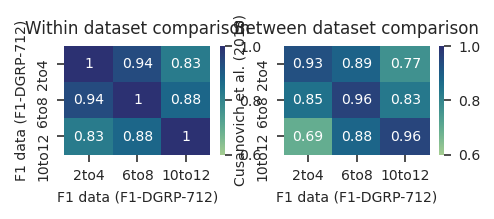

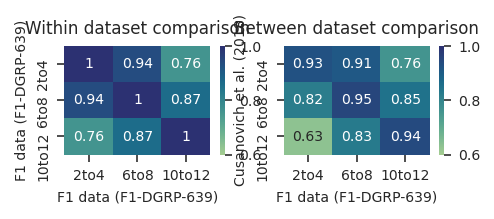

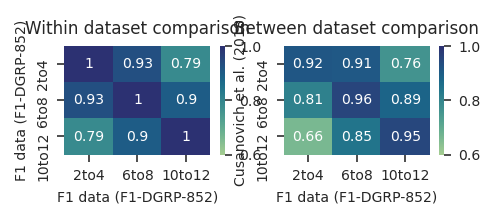

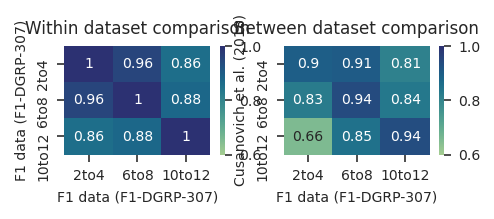

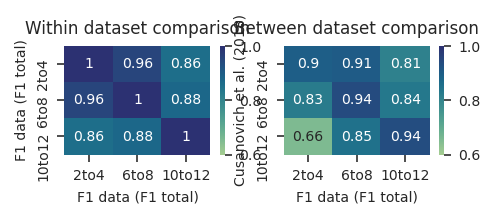

In [27]:
for exp_id in settings.F1_EXP_IDS + ['F1 total']:
    cor = pd.concat([exp_id_pbulk[exp_id], exp_id_pbulk['cusanovich']], 1).corr()
    exp_id_cols = [exp_id + '_' + x for x in settings.TIMEPOINTS]
    cusano_cols = ['cusanovich_' + x for x in settings.TIMEPOINTS]
    
    plot_kwargs = {
        'annot': True, 
        'cmap': 'crest', 
        'xticklabels': settings.TIMEPOINTS, 
        'yticklabels': settings.TIMEPOINTS,
        'vmin': 0.6,
        'vmax': 1
    }
    
    f1_id = F1_IDS[exp_id] if exp_id != 'F1 total' else exp_id
    fig, axes = plt.subplots(1, 2, figsize=(3.6, 1))
    sns.heatmap(cor.loc[exp_id_cols, exp_id_cols], **plot_kwargs, ax=axes[0])
    axes[0].set(xlabel='F1 data (%s)' % f1_id, ylabel='F1 data (%s)' % f1_id, title='Within dataset comparison')
    sns.heatmap(cor.loc[exp_id_cols, cusano_cols], **plot_kwargs, ax=axes[1])
    axes[1].set(xlabel='F1 data (%s)' % f1_id, ylabel='Cusanovich et al. (2018)', title='Between dataset comparison')
    plt.show()
    save_panel(fig)
    plt.close()

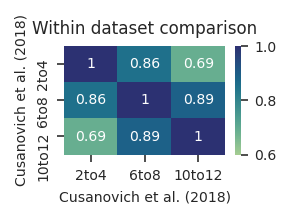

In [28]:
cor = exp_id_pbulk['cusanovich'].corr()
cusano_cols = ['cusanovich_' + x for x in settings.TIMEPOINTS]

plot_kwargs = {
    'annot': True, 
    'cmap': 'crest', 
    'xticklabels': settings.TIMEPOINTS, 
    'yticklabels': settings.TIMEPOINTS,
    'vmin': 0.6,
    'vmax': 1
}
fig, ax = plt.subplots(figsize=(1.8, 1))
sns.heatmap(cor.loc[cusano_cols, cusano_cols], **plot_kwargs, ax=ax)
ax.set(xlabel='Cusanovich et al. (2018)', ylabel='Cusanovich et al. (2018)', title='Within dataset comparison')
plt.show()
save_panel(fig)
plt.close()